# Project Overview

This project is based on the classic Kaggle competition **"Titanic: Machine Learning from Disaster"**, where the goal is to build a predictive model that estimates survival chances of passengers on the Titanic.

The competition is designed for newcomers to data science and serves as a hands-on introduction to supervised machine learning. It provides a small but rich dataset with various types of features, including numerical, categorical, and text data.

## Why this project matters

- It offers a **practical and approachable introduction** to machine learning.
- It includes **real-world data** with missing values, outliers, and both categorical and numerical features — all of which are typical challenges in data analysis.
- It allows for experimentation with different **data preprocessing techniques, modeling approaches, and feature engineering**.
- It provides an opportunity to learn about **evaluation metrics, model validation, and Kaggle submission formats**.

By the end of this project, we aim to:
- Understand the structure and limitations of the dataset
- Explore the data using visualization and summary statistics
- Prepare the data for modeling
- Build and compare multiple classification models
- Submit a prediction file to Kaggle and interpret our model’s performance

# Directory Structure

| Folder/File              | Description                                            |
|--------------------------|--------------------------------------------------------|
| `data/`                 | Contains original datasets downloaded from Kaggle      |
| ├── `train.csv`         | Training set with target column (`Survived`)           |
| ├── `test.csv`          | Test set without target values                         |
| └── `gender_submission.csv` | Sample submission file provided by Kaggle         |
| `models/`               | Placeholder for saved model files (if needed later)    |
| `notebooks/`            | Jupyter notebooks with analysis and modeling steps     |
| └── `Titanic.ipynb` | Main notebook for EDA and experiments                  |
| `outputs/`              | Folder for generated files such as submissions, plots  |
| `README.md`             | Project overview and documentation                     |

# Objective and Task Description

## Objective

The main goal of this project is to **develop a robust machine learning model that can accurately predict whether a passenger survived the Titanic disaster**, based on available personal and socio-economic information.

## Task Breakdown

- **Data Familiarization:** Understand the structure, limitations, and business context of the data. Identify potential bias or leakage risks.
- **Exploratory Data Analysis (EDA):** Investigate patterns and relationships in the data to inform preprocessing and modeling decisions.
- **Preprocessing:** Handle missing values, inconsistent data types, and categorical variables using reproducible pipelines.
- **Feature Engineering:** Derive meaningful features that can improve model performance, such as title extraction, family size, or ticket type grouping.
- **Model Development:** Train baseline and advanced classification models using `scikit-learn`, evaluate using cross-validation and domain-appropriate metrics (e.g., accuracy, precision/recall).
- **Interpretability:** Analyze feature importance to explain the decision logic and identify the most predictive attributes.
- **Submission & Iteration:** Prepare model output for submission to Kaggle and evaluate performance on the public leaderboard.

## Business Framing

This task simulates a real-world classification challenge where the model:
- Helps **prioritize resources or interventions** based on survival likelihood (in a broader context, such models can be used in crisis response or customer segmentation),
- Trains on **limited historical data**, with **imperfect labels** and **missing values**, reflecting realistic challenges in many domains,
- Encourages **iterative experimentation** to balance performance, generalization, and simplicity.

## Long-Term Focus

Although the Titanic dataset is small, the project builds a strong foundation in:
- ML problem-solving workflows
- Data cleaning and transformation
- Model validation strategy

# Initial Setup

This section outlines the environment setup, library imports, and configuration to ensure the project is **reproducible and consistent** across systems.

## Environment

The project was developed using:

- **Python**: 3.10+
- **Jupyter Notebook**: for development and documentation
- **Libraries**:
  - `pandas` — data manipulation
  - `numpy` — numerical operations
  - `matplotlib` / `seaborn` — data visualization
  - `scikit-learn` — modeling and evaluation

In [5]:
!pip install scikit-learn
import sys
!{sys.executable} -m pip install scikit-learn

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

# Data Overview

The Titanic dataset consists of **passenger-level information** from the Titanic shipwreck. It is split into two CSV files:

- `train.csv` — 891 rows with known outcomes (used for training)
- `test.csv` — 418 rows without target labels (used for evaluation on Kaggle)
---
- `gender_submission.csv` — an example of correct submission format

## Feature Summary

Below is a summary of the key features in the dataset:

| Feature         | Type        | Description                                                                 |
|----------------|-------------|-----------------------------------------------------------------------------|
| `PassengerId`  | Integer     | Unique identifier for each passenger                                       |
| `Survived`     | Binary (0/1)| Target variable — 1 = survived, 0 = did not survive (**only in train.csv**)|
| `Pclass`       | Categorical | Passenger class (1st, 2nd, 3rd) — proxy for socio-economic status          |
| `Name`         | Text        | Passenger name, often includes title                                       |
| `Sex`          | Categorical | Gender (male/female)                                                       |
| `Age`          | Float       | Age in years; may contain missing values                                   |
| `SibSp`        | Integer     | Number of siblings/spouses aboard                                          |
| `Parch`        | Integer     | Number of parents/children aboard                                          |
| `Ticket`       | Text        | Ticket number — sometimes contains prefixes                                |
| `Fare`         | Float       | Passenger fare (currency: £)                                               |
| `Cabin`        | Text        | Cabin number — many missing values                                         |
| `Embarked`     | Categorical | Port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton        |

## Notes

- The **target variable** is `Survived`, present only in the training set.
- Some features such as `Cabin` and `Age` have a high percentage of **missing values**.

In [7]:
# Let's overview data

# Load datasets
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
sub_df = pd.read_csv('../data/gender_submission.csv')

# Basic info
print(train_df.shape)
print(train_df.info())
print('---')
print(train_df.head())
print('---')
print(test_df.shape)
print(test_df.info())
print('---')
print(test_df.head())
print('---')
print(sub_df.shape)
print(sub_df.info())
print('---')
print(sub_df.head())

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

        

In [8]:
# Basic statistics
print(train_df.describe())
print('---')
print(test_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
---
       PassengerId      Pclass         Age       SibSp       Parch        Far

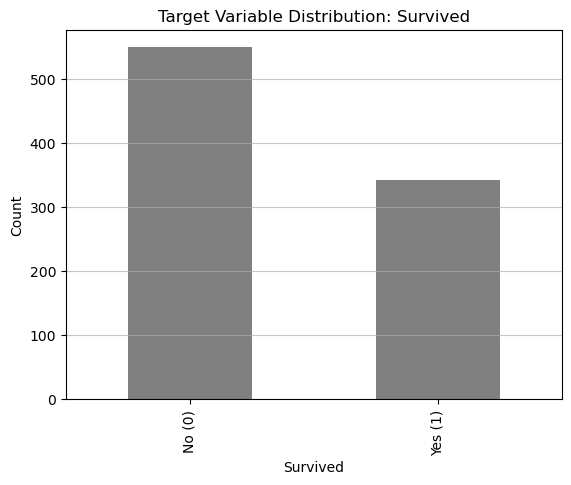

Survived
0    549
1    342
Name: count, dtype: int64


In [9]:
# Target Variable Distribution
train_df['Survived'].value_counts().plot(kind='bar', color='gray')
plt.title('Target Variable Distribution: Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()
print(train_df['Survived'].value_counts().sort_index())

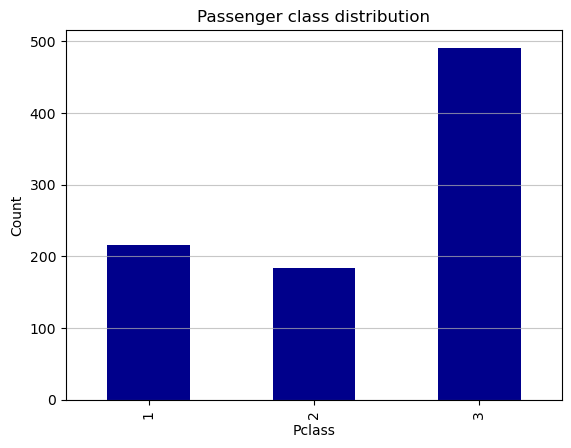

Pclass
1    216
2    184
3    491
Name: count, dtype: int64


In [10]:
# Passenger class distribution
train_df['Pclass'].value_counts().sort_index().plot(kind='bar', color='darkblue')
plt.title('Passenger class distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()
print(train_df['Pclass'].value_counts().sort_index())

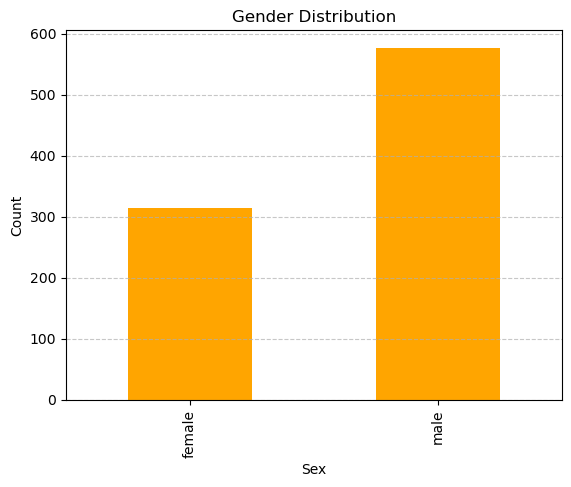

Sex
male      577
female    314
Name: count, dtype: int64


In [11]:
# Gender Distribution
train_df['Sex'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print(train_df['Sex'].value_counts())

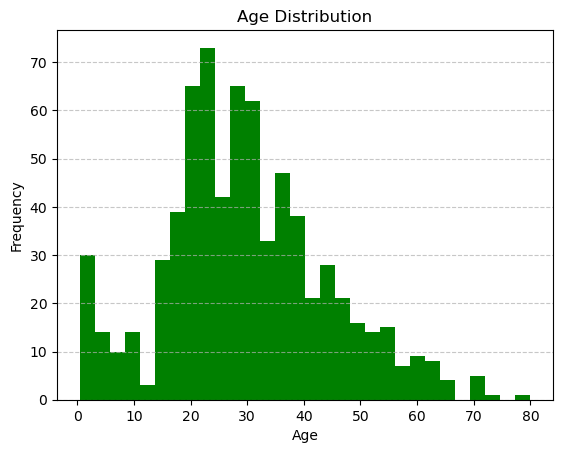

AgeGroup
0-10      64
11-18     75
19-30    272
31-40    155
41-60    126
60+       22
Name: count, dtype: int64


In [12]:
# Age Distribution
train_df['Age'].plot(kind='hist', bins=30, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Age bins
age_bins = [0, 11, 19, 31, 41, 61, 101]
age_labels = ['0-10', '11-18', '19-30', '31-40', '41-60', '60+']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, right=False)
print(train_df['AgeGroup'].value_counts().sort_index())
train_df.drop('AgeGroup', axis=1, inplace=True)

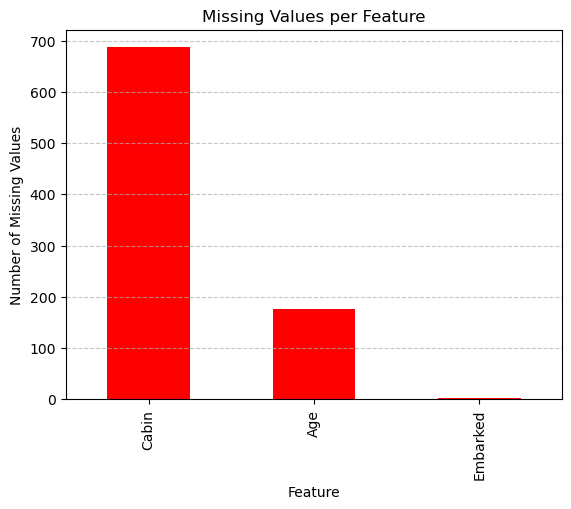

Cabin       687
Age         177
Embarked      2
dtype: int64

In [13]:
# Missing Values per Feature
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

missing.plot(kind='bar', color='red')
plt.title('Missing Values per Feature')
plt.xlabel('Feature')
plt.ylabel('Number of Missing Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
missing

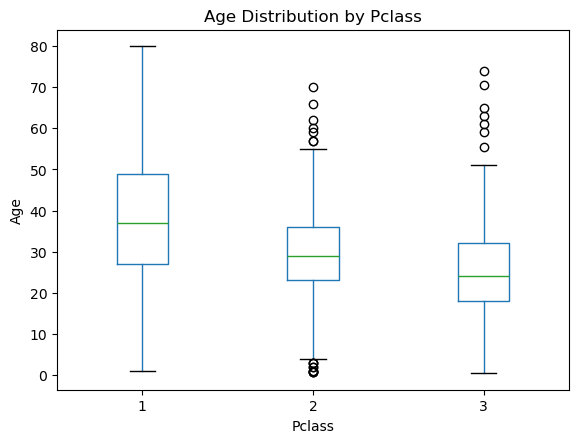

In [14]:
# Age Distribution by Pclass
train_df.boxplot(column='Age', by='Pclass', grid=False)
plt.title('Age Distribution by Pclass')
plt.suptitle('')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

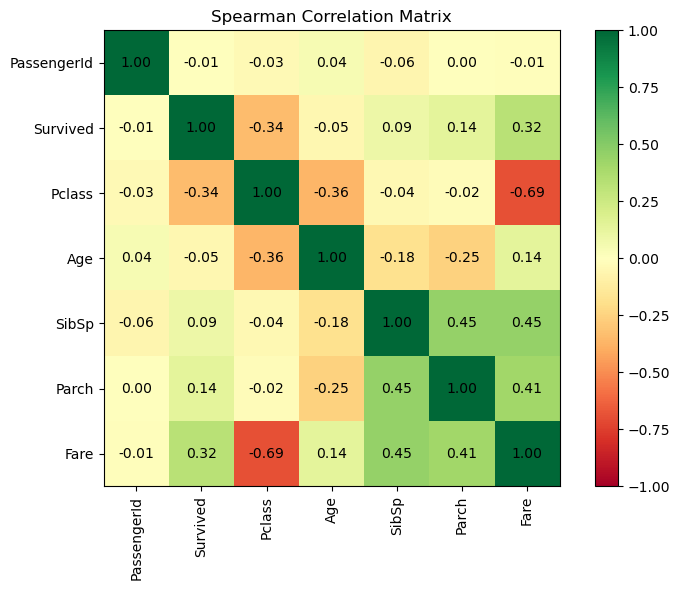

In [15]:
# Let's see correlation

numeric_df = train_df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr(method='spearman')
plt.figure(figsize=(8, 6))

im = plt.imshow(corr_matrix, cmap='RdYlGn', vmin=-1, vmax=1)

plt.xticks(
    ticks=range(len(corr_matrix.columns)), 
    labels=corr_matrix.columns, 
    rotation=90
)
plt.yticks(
    ticks=range(len(corr_matrix.index)), 
    labels=corr_matrix.index
)

for i in range(len(corr_matrix.index)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[i, j]
        plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='black')

plt.colorbar(im)
plt.title("Spearman Correlation Matrix")
plt.tight_layout()
plt.show()

# Exploratory Data Analysis (EDA)

## Missing Values
Three features in the training set contain missing values:
- `Cabin`: missing in ~77% of rows — likely too sparse to use directly
- `Age`: missing in ~20% — imputation required
- `Embarked`: only 2 missing values — can be safely filled with the mode

We will later engineer or drop `Cabin`, and apply imputation strategies to `Age`.

## Target Variable Distribution
The target variable `Survived` is imbalanced:
- ~38% of passengers survived
- ~62% did not survive

This moderate imbalance may impact classification performance. Stratified splits or class-weighted models may help.

## Numerical Features
- **Age** ranges from infants to 80 years old, with most passengers aged 20–40.
- **Fare** is highly skewed with outliers above 500 — log transformation may improve modeling.
- **SibSp** and **Parch** are both right-skewed; most passengers traveled alone.
- **Boxplot of `Age` by `Pclass`** shows that median age increases with passenger class, and no extreme outliers are present.

## Categorical Features
- **Sex**: more males than females; survival rate appears higher for females (to be confirmed during modeling).
- **Pclass**: most passengers are in 3rd class; 1st class passengers more likely to survive (correlation: -0.34).
- **Embarked**: majority boarded from Southampton (`S`), some from Cherbourg (`C`) and Queenstown (`Q`).

## Correlations (Spearman)
- `Survived` is:
  - **negatively correlated** with `Pclass` (−0.34) → higher class = higher survival chance
  - **positively correlated** with `Fare` (+0.32) → wealthier passengers more likely to survive
  - weakly positively correlated with `Parch` and `SibSp` → traveling with family may help
  - Strong correlation between `SibSp` and `Parch` (+0.45) indicates shared signal (may be combined into a "family size" feature)
- Strongest correlation in the dataset:
  - **`Pclass` and `Fare`: −0.69** — higher-class passengers paid significantly more
  - This reflects socio-economic status and should be considered carefully to avoid redundant features.
  - If using both in linear models, regularization or feature selection may be required.

- `SibSp` and `Parch`: +0.45 — may be merged into a single "family size" feature.

## Summary
The data reveals clear relationships between socio-economic status, gender, and survival. Further analysis and feature engineering will aim to:
- Impute or transform skewed/missing features
- Encode categorical variables
- Derive new features (e.g., title from `Name`, family size from `SibSp` + `Parch`)

These insights will inform our preprocessing and modeling pipeline.


# Data Cleaning

1. **Merge datasets**
   - Concatenate `train` and `test` into one `df_full` with a `set` column: `"train"` / `"test"`
   - This ensures consistent encoding and transformations

2. **Handle missing values**
   - `Embarked`: fill with mode
   - `Fare`: fill missing in test set with median fare for the matching Pclass
   - `Age`: fill using grouped median by `Title` (to be extracted from `Name`)
   - `Cabin`: fill missing as `"Un"` (unknown)

3. **Feature simplification and extraction**
   - `Cabin` - extract deck letter
   - `Name` - extract `Title` (Mr, Mrs, Miss, etc.)
   - `SibSp` + `Parch` → derive `FamilySize` = `SibSp` + `Parch` + 1
   - `Ticket` - extract prefix

In [18]:
# Add column "Survived" to test_df
test_df['Survived'] = np.nan

# Add identifier column
train_df['set'] = 'train'
test_df['set'] = 'test'

# Concatenation 
df_full = pd.concat([train_df, test_df], ignore_index=True)
df_full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [19]:
# Let's see missing values
print(df_full.isnull().sum())
df_full.shape

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
set               0
dtype: int64


(1309, 13)

In [20]:
# Let's fill in the blanks at Embarked

# Column mode
most_common = df_full['Embarked'].mode()[0]

# Fill in missing values
df_full['Embarked'] = df_full['Embarked'].fillna(most_common)

# Title extraction
def extract_title(name):
    if ',' in name and '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    return 'Unknown'

df_full['Title'] = df_full['Name'].apply(extract_title)
df_full['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Don               1
Sir               1
Lady              1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [21]:
# Let's group the rare titles
def simplify_title(title):
    mapping = {
        'Mlle': 'Miss',
        'Ms': 'Miss',
        'Mme': 'Mrs',
        'Lady': 'Rare',
        'Countess': 'Rare',
        'Capt': 'Rare',
        'Col': 'Rare',
        'Don': 'Rare',
        'Dr': 'Rare',
        'Major': 'Rare',
        'Rev': 'Rare',
        'Sir': 'Rare',
        'Jonkheer': 'Rare',
        'Dona': 'Rare',
        'the Countess': 'Rare'
    }
    return mapping.get(title, title)

df_full['Title'] = df_full['Title'].apply(simplify_title)
df_full['Title'].value_counts()

Title
Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: count, dtype: int64

In [22]:
# Let's fill in missing values in 'Age'
df_full['Age'] = df_full.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [23]:
# Let's see missing values
print(df_full.isnull().sum())
df_full.shape

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
set               0
Title             0
dtype: int64


(1309, 14)

In [24]:
# Let's fill in the missing Fare value with the median price for the corresponding class
df_full['Fare'] = df_full.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

In [25]:
# Let's see missing values
print(df_full.isnull().sum())
df_full.shape

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
set               0
Title             0
dtype: int64


(1309, 14)

In [26]:
# Let's fill in missing values in Cabin
df_full['Cabin'] = df_full['Cabin'].fillna('U')

In [27]:
# Let's see missing values
print(df_full.isnull().sum())
df_full.shape

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
set              0
Title            0
dtype: int64


(1309, 14)

In [28]:
# Let's create new column 'Deck' with only first letter in every cell from 'Cabin'
df_full['Deck'] = df_full['Cabin'].astype(str).str[0]
df_full['Deck'].value_counts()

Deck
U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [29]:
# Let's create new column 'FamilySize'
df_full['FamilySize'] = df_full['SibSp'] + df_full['Parch'] + 1
display(df_full['FamilySize'].value_counts())

df_full['FamilyGroup'] = pd.cut(df_full['FamilySize'],
                                bins=[0, 1, 4, 11],
                                labels=['Alone', 'Small', 'Large'])
df_full['FamilyGroup'].value_counts()

FamilySize
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: count, dtype: int64

FamilyGroup
Alone    790
Small    437
Large     82
Name: count, dtype: int64

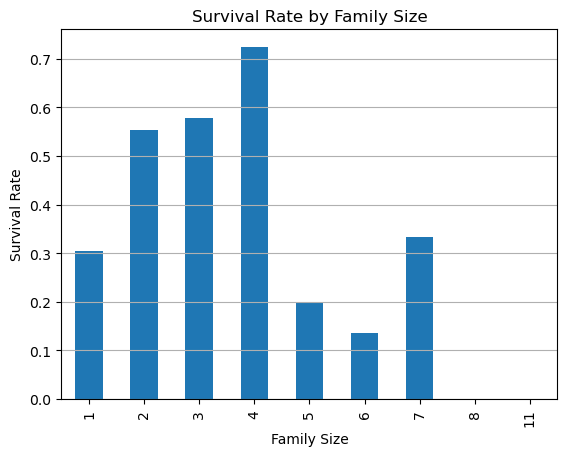

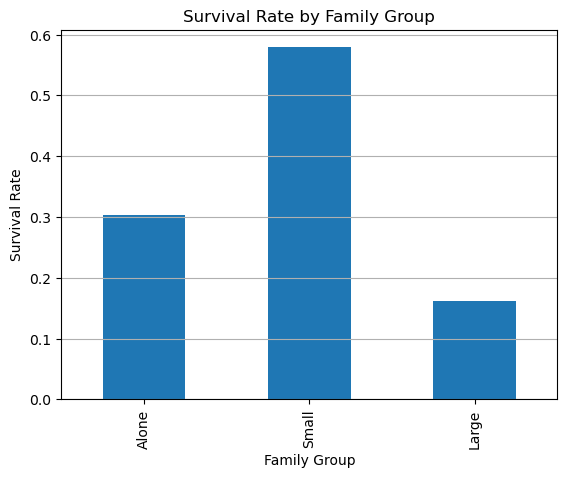

In [30]:
# Family size and survival
df_full[df_full['set'] == 'train'].groupby('FamilySize', observed=False)['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.grid(axis='y')
plt.show()

# Family group and survival
df_full[df_full['set'] == 'train'].groupby('FamilyGroup', observed=False)['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Family Group')
plt.ylabel('Survival Rate')
plt.xlabel('Family Group')
plt.grid(axis='y')
plt.show()


In [31]:
# Let's separate cabis letters in column
df_full['CabinLetter'] = df_full['Cabin'].str[0]
df_full['CabinLetter'].value_counts()

CabinLetter
U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

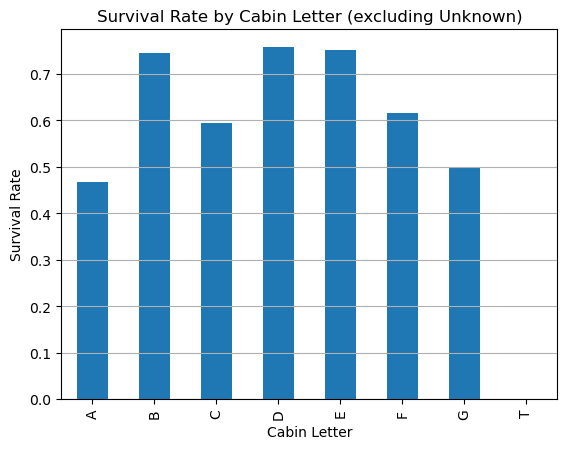

CabinLetter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
U    0.299854
Name: Survived, dtype: float64

In [32]:
# Cabin letter and survival
df_full[(df_full['set'] == 'train') & (df_full['CabinLetter'] != 'U')] \
    .groupby('CabinLetter')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Cabin Letter (excluding Unknown)')
plt.ylabel('Survival Rate')
plt.xlabel('Cabin Letter')
plt.grid(axis='y')
plt.show()
surv = df_full[df_full['set'] == 'train'].groupby('CabinLetter', observed=False)['Survived'].mean()
surv

In [33]:
# Let's extract ticket prefix
def ext(ticket):
    parts = ticket.replace('.', '').replace('/', '').split()
    if len(parts) == 1:
        return 'None'
    elif parts[0].isalpha() or not parts[0].isdigit():
        return parts[0]
    else:
        return 'None'
        
df_full['TicketPrefix'] = df_full['Ticket'].apply(ext)
prefix_counts = df_full['TicketPrefix'].value_counts()
common_prefixes = prefix_counts[prefix_counts > 14].index  # например, 10+

df_full['TicketPrefix'] = df_full['TicketPrefix'].apply(lambda x: x if x in common_prefixes else 'Other')

df_full['TicketPrefix'].value_counts()

TicketPrefix
None       961
Other      121
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
Name: count, dtype: int64

# Data Preprocessing

In [34]:
# Define feature groups
categorical_features = ['Sex', 'Embarked', 'Title', 'CabinLetter', 'TicketPrefix', 'FamilyGroup']
numeric_features = ['Age', 'Fare', 'FamilySize']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_features)
])

# Base pipeline (model will be replaced in GridSearch)
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))  # temporary placeholder
])

# Define parameter grid for Random Forest
param_grid = {
    'clf': [RandomForestClassifier(random_state=42)],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [4, 6, 8, None],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
}

# Extract training data
X_train = df_full[df_full['set'] == 'train'].drop(columns=['Survived', 'set', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
y_train = df_full[df_full['set'] == 'train']['Survived']

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Output best score and parameters
print(f"Best ROC-AUC score: {grid_search.best_score_:.4f}")
print("Best parameters:", grid_search.best_params_)

# Use best estimator
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best ROC-AUC score: 0.8755
Best parameters: {'clf': RandomForestClassifier(random_state=42), 'clf__max_depth': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}


### Hyperparameter Tuning with GridSearchCV

At this stage, I performed hyperparameter tuning for the Random Forest model using `GridSearchCV`.

- A pipeline was created that includes:
  - standardization of numerical features (`StandardScaler`);
  - one-hot encoding of categorical features (`OneHotEncoder`);
  - a `RandomForestClassifier` as the classifier.
  
- A parameter grid was defined for tuning:
  - `n_estimators`: 100, 200
  - `max_depth`: 4, 6, 8, None
  - `min_samples_split`: 2, 5
  - `min_samples_leaf`: 1, 2

- Training was performed with 5-fold cross-validation using the **ROC-AUC** metric.
- A total of 32 parameter combinations were tested, resulting in 160 fits.

**Result:**
- Best ROC-AUC score: **0.8755**
- Best parameters:
  ```python
  {
      'clf': RandomForestClassifier(random_state=42),
      'clf__n_estimators': 200,
      'clf__max_depth': None,
      'clf__min_samples_split': 2,
      'clf__min_samples_leaf': 2
  }


# Model training

In [35]:
# Separate test features
X_test = df_full[df_full['set'] == 'test'].drop(columns=['Survived', 'set', 'Name', 'Ticket', 'Cabin', 'PassengerId'])

# Fit the best model on the full training data
best_model.fit(X_train, y_train)

# Predict probabilities on the test set (for ROC-AUC or threshold tuning)
test_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Predict binary outcomes for Kaggle submission (threshold = 0.5)
test_pred = (test_pred_proba >= 0.5).astype(int)

# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': df_full[df_full['set'] == 'test']['PassengerId'],
    'Survived': test_pred
})

# Save submission file
submission.to_csv('submission.csv', index=False)

# Show
submission


,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


### Final Predictions and Submission File

- The test set was separated from the full dataset (excluding target and unnecessary columns).
- The best model (selected via GridSearchCV) was trained on the entire training data.
- Predictions were made on the test set in two forms:
  - Probabilities (`predict_proba`) — can be used for further threshold tuning or metrics like ROC-AUC.
  - Binary predictions (`Survived` = 0 or 1) using a 0.5 threshold — required for Kaggle submission.

- A submission file was created in the correct format:
  - Columns: `PassengerId`, `Survived`
  - Saved as `submission.csv`


## ✅ First Submission Summary

First full pipeline — including preprocessing, feature engineering, and model tuning with `GridSearchCV` — resulted in a **public leaderboard score of 0.77511**.  
This roughly corresponds to correctly predicting the survival status for ~77.5% of passengers in the test set.

According to the current leaderboard, this result places the model **above the median**, but **still outside the top quartile**.  
The solution is solid for a first attempt but has room for improvement.

### 🔭 Next Goal:
Improve the score and push the model into the **top 25% of participants**.

To do so, we will explore:
- Feature selection and dimensionality reduction;
- Advanced ensemble methods
- Better handling of outliers and rare categories;
- Additional cross-validation strategies.

This checkpoint establishes our baseline. Let’s keep improving!
